In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation

In [2]:
data=pd.read_csv('Desktop/disease/drug200.csv')
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


### Check missing values

In [3]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

### Info about data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
data.shape

(200, 6)

* Check Unique Values

In [6]:
data.Sex.unique()

array(['F', 'M'], dtype=object)

In [7]:
data.BP.unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [8]:
data.Cholesterol.unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [9]:
data.Drug.unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

## Visualization before convert Categorical data

* Scatterplot to feature  Categorical variables

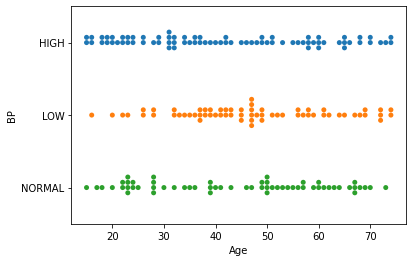

In [10]:
# between categrical data & numeric data
sns.swarmplot(x=data['Age'],y=data['BP'])
plt.show()

### Categorical Data

* Ordinal Data   >> Label Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [12]:
le=LabelEncoder()

In [13]:
data['BP']=le.fit_transform(data['BP'])

In [14]:
data['Cholesterol']=le.fit_transform(data['Cholesterol'])

In [15]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,0,0,25.355,DrugY
1,47,M,1,0,13.093,drugC
2,47,M,1,0,10.114,drugC
3,28,F,2,0,7.798,drugX
4,61,F,1,0,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,1,0,11.567,drugC
196,16,M,1,0,12.006,drugC
197,52,M,2,0,9.894,drugX
198,23,M,2,1,14.020,drugX


* Nomial Data  >> OneHotEncoder

In [16]:
encoder=OneHotEncoder(sparse=False)

In [17]:
encoder=pd.get_dummies(data['Sex'])
encoder

,F,M
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
195,1,0
196,0,1
197,0,1
198,0,1


In [18]:
data.drop(['Sex'],axis=1,inplace=True)
data

,Age,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,25.355,DrugY
1,47,1,0,13.093,drugC
2,47,1,0,10.114,drugC
3,28,2,0,7.798,drugX
4,61,1,0,18.043,DrugY
...,...,...,...,...,...
195,56,1,0,11.567,drugC
196,16,1,0,12.006,drugC
197,52,2,0,9.894,drugX
198,23,2,1,14.020,drugX


In [19]:
new_data=pd.concat([encoder,data],axis=1)
new_data

,F,M,Age,BP,Cholesterol,Na_to_K,Drug
0,1,0,23,0,0,25.355,DrugY
1,0,1,47,1,0,13.093,drugC
2,0,1,47,1,0,10.114,drugC
3,1,0,28,2,0,7.798,drugX
4,1,0,61,1,0,18.043,DrugY
...,...,...,...,...,...,...,...
195,1,0,56,1,0,11.567,drugC
196,0,1,16,1,0,12.006,drugC
197,0,1,52,2,0,9.894,drugX
198,0,1,23,2,1,14.020,drugX


# Data Visualization

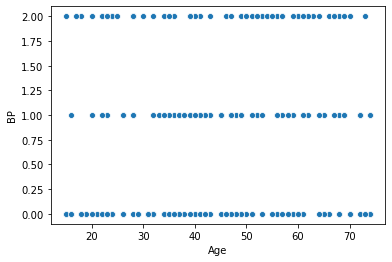

In [20]:
sns.scatterplot(x=new_data['Age'],y=new_data['BP'])       # Using scatterplot
plt.show()

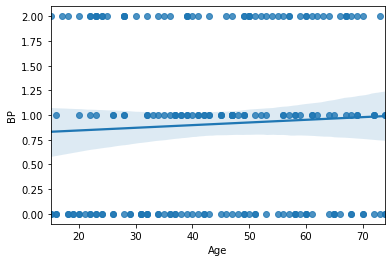

In [21]:
sns.regplot(x=new_data['Age'],y=new_data['BP'])    # add regression line that best fit data
plt.show()

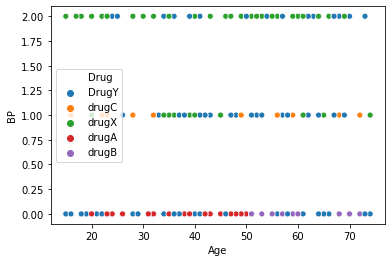

In [22]:
sns.scatterplot(x=new_data['Age'],y=new_data['BP'],hue=new_data['Drug'])
plt.show()

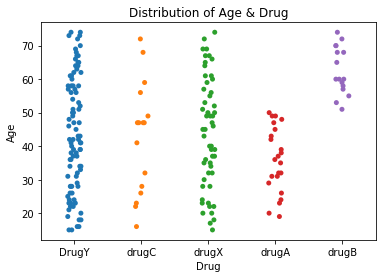

In [23]:
# Visualize age and drug type using strip plot
# Plotting a swarmplot to get a distribution of categorical and numerical variables
sns.stripplot(x = 'Drug' , y = 'Age' , data =new_data)
plt.title('Distribution of Age & Drug')
plt.show()

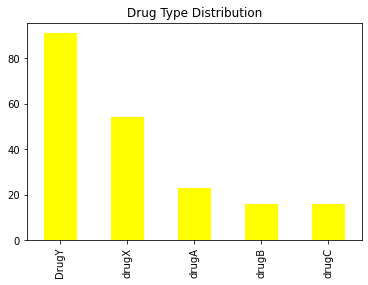

In [24]:
new_data['Drug'].value_counts().plot(kind = 'bar' , x = 'Drug Type' , y = 'Drug Type Count' , color = 'yellow' )
plt.title('Drug Type Distribution')
plt.show()

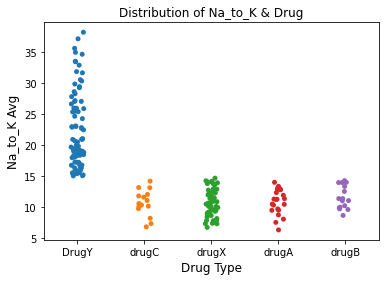

In [25]:
# Visualize Na_to_K and drug type using strip plot
sns.stripplot(x = 'Drug' , y = 'Na_to_K' , data = new_data)
plt.xlabel('Drug Type' , fontsize = 12)
plt.ylabel('Na_to_K Avg' , fontsize = 12)
plt.title('Distribution of Na_to_K & Drug')
plt.show()

* work on Drug column

In [26]:
my_labels=data.Drug.unique().tolist() 
my_labels

['DrugY', 'drugC', 'drugX', 'drugA', 'drugB']

In [27]:
data.Drug.value_counts()       # counts of each value

DrugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: Drug, dtype: int64

In [28]:
values=data.Drug.value_counts().tolist()
values_n=[91,16,54,23,16]
values_n
my_explode=[.2,.1,.1,.1,.1]

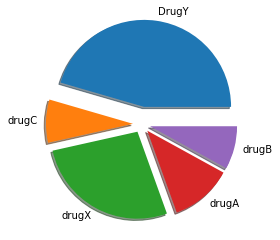

In [29]:
plt.pie(values_n,labels=my_labels,explode=my_explode,shadow=True)
plt.show()

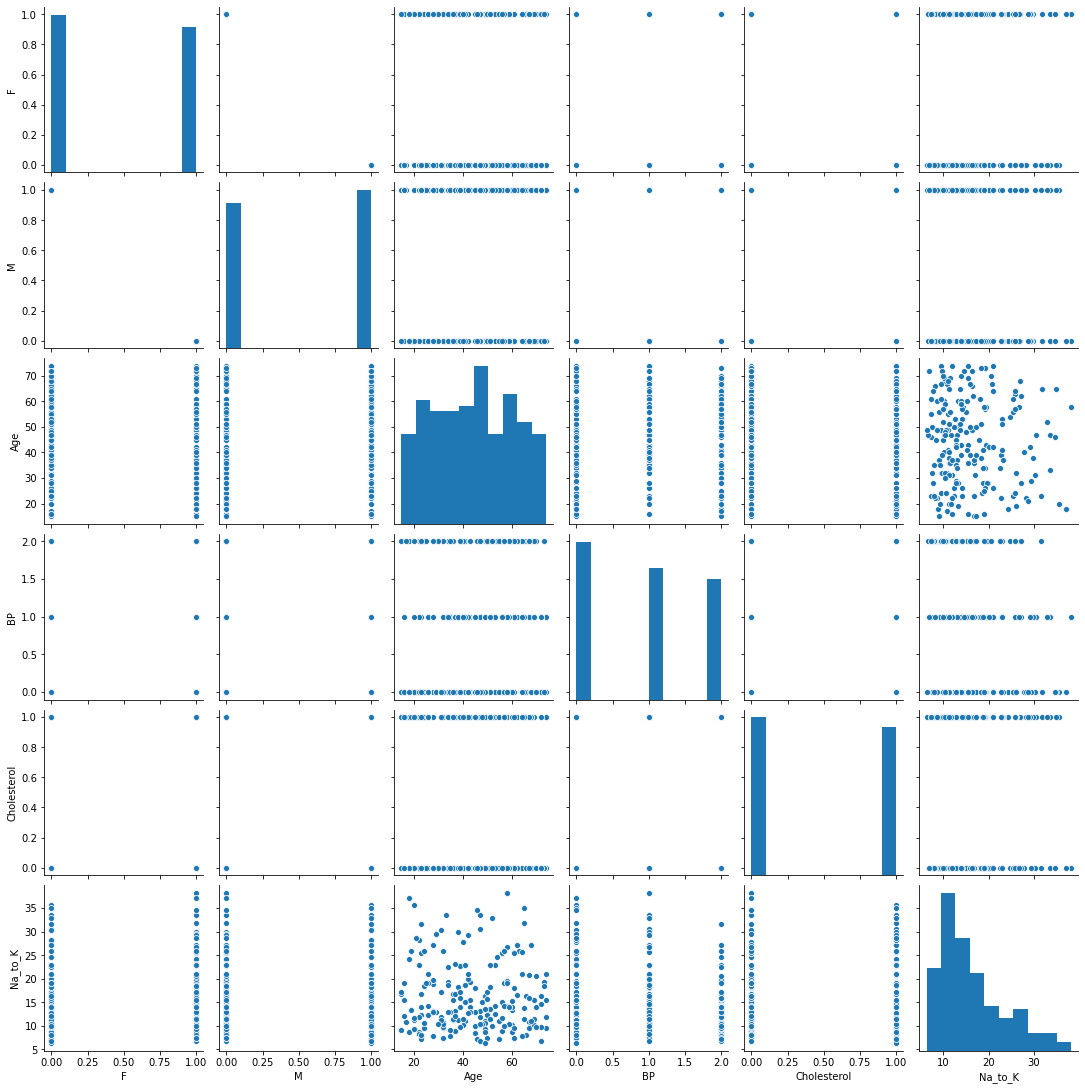

In [30]:
sns.pairplot(new_data)
plt.show()

# Spilt DataSet

In [31]:
x=new_data.iloc[:,:-1]    # independent
y=new_data.iloc[:,-1]     # dependent
y

0      DrugY
1      drugC
2      drugC
3      drugX
4      DrugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [32]:
x

,F,M,Age,BP,Cholesterol,Na_to_K
0,1,0,23,0,0,25.355
1,0,1,47,1,0,13.093
2,0,1,47,1,0,10.114
3,1,0,28,2,0,7.798
4,1,0,61,1,0,18.043
...,...,...,...,...,...,...
195,1,0,56,1,0,11.567
196,0,1,16,1,0,12.006
197,0,1,52,2,0,9.894
198,0,1,23,2,1,14.020


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

# Learning (Classification)

* Naive Bayes Algorithm

In [35]:
from sklearn.naive_bayes import GaussianNB

In [36]:
gnb=GaussianNB()    

In [37]:
gnb.fit(x_train,y_train)

GaussianNB()

In [38]:
y_predict=gnb.predict(x_test)      # output
y_predict

array(['DrugY', 'drugX', 'drugX', 'DrugY', 'drugX', 'DrugY', 'drugX',
       'drugA', 'drugA', 'drugC', 'drugA', 'DrugY', 'DrugY', 'DrugY',
       'drugA', 'drugX', 'DrugY', 'drugX', 'DrugY', 'drugX', 'DrugY',
       'DrugY', 'DrugY', 'drugX', 'drugB', 'drugX', 'drugX', 'drugA',
       'DrugY', 'drugC', 'DrugY', 'drugX', 'drugC', 'DrugY', 'drugB',
       'drugX', 'drugB', 'DrugY', 'DrugY', 'DrugY'], dtype='<U5')

In [39]:
import sklearn.metrics as mc

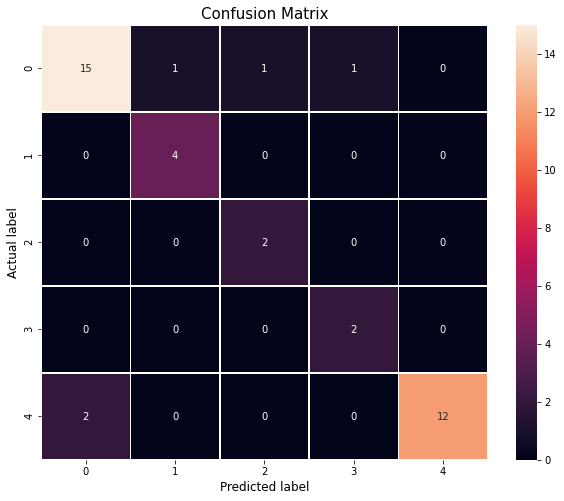

In [40]:
conf_matrix =mc.confusion_matrix(y_test , y_predict)
plt.figure(figsize = (10, 8))
sns.heatmap(conf_matrix,annot=True,linewidths=.5)
plt.ylabel('Actual label' , fontsize = 12)
plt.xlabel('Predicted label' , fontsize = 12)
plt.title('Confusion Matrix' , fontsize = 15)
plt.show()

# Validation

In [41]:
report=mc.classification_report(y_test,y_predict)
report

'              precision    recall  f1-score   support\n\n       DrugY       0.88      0.83      0.86        18\n       drugA       0.80      1.00      0.89         4\n       drugB       0.67      1.00      0.80         2\n       drugC       0.67      1.00      0.80         2\n       drugX       1.00      0.86      0.92        14\n\n    accuracy                           0.88        40\n   macro avg       0.80      0.94      0.85        40\nweighted avg       0.89      0.88      0.88        40\n'

In [42]:
mc.accuracy_score(y_test,y_predict)

0.875